# EDA - Climate Change

### Setup Dependencies

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as stats
from scipy.stats import ttest_ind
from pingouin import ttest
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

### Import CO2 Data (Mauna Loa Weather Station - Hawaii) (Data 1959 - 2015)

In [2]:
# https://gml.noaa.gov/ccgg/trends/data.html
# Mauna Loa CO2 annual mean data( text) or (CSV)
# CO2 data from 1959 to 2015

file = "CO2_DataSet_1.csv"

# Read the  csv and store into Pandas DataFrame
co2_df = pd.read_csv(file, encoding="utf-8")
# co2_df

### Clean Data Set (Remove Columns and Rename, Delete Nan, Change Year Data Type)

In [3]:
co2_clean_df = co2_df.iloc[:,[0,1]]
co2_clean_df = co2_clean_df.rename(columns={"year":"Year","mean":"CO2(ppm)"})
co2_clean_df

,Year,CO2(ppm)
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66
61,2020.0,414.24


In [4]:
co2_clean_df.dropna(subset = ['Year'], inplace=True)
co2_clean_df

,Year,CO2(ppm)
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
57,2016.0,404.41
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66


In [5]:
# Show data types for all columns 
# co2_clean_df.dtypes

co2_clean_df['Year'] = co2_clean_df.loc[:,'Year'].astype(int)
# co2_clean_df.info()
# co2_clean_df


### Import CO2 Data - Ice Core Samples (1000 to 2004)

In [6]:
# https://www.ncei.noaa.gov/access/paleo-search/?dataTypeId=7
# CO2 concentration from ice core samples
# CO2 data from 1000 to 2004

file = "smoothedco2.csv"

# Read the  csv and store into Pandas DataFrame
ice_co2_df = pd.read_csv(file, encoding="utf-8")
ice_co2_df

,Year,ALL_50_full,LD_050,DML_050,ALL_050,LD_075,DML_075,ALL_075,LD_100,DML_100,...,ALL_125,LD_150,DML_150,ALL_150,LD_175,DML_175,ALL_175,LD_200,DML_200,ALL_200
0,1000,278.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,278.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,278.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,278.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,278.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2000,366.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,2001,368.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,2002,369.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,2003,371.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean Ice Core Data (Rename Columns and correct data types)

In [7]:
ice_co2_clean_df = ice_co2_df.iloc[:,[0,1]]
ice_co2_clean_df = ice_co2_clean_df.rename(columns={"ALL_50_full":"CO2(ppm)"})
ice_co2_clean_df

,Year,CO2(ppm)
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1000,2000,366.40
1001,2001,368.03
1002,2002,369.66
1003,2003,371.30


In [8]:
# Show data types for all columns 
# ice_co2_clean_df.dtypes


### Merge Mauna Loa Weather Station and Ice Core CO2 Data

In [9]:
co2_merge = pd.merge(co2_clean_df,ice_co2_clean_df,how='outer',on='Year')
co2_merge = co2_merge.sort_values(by=["Year"])

co2_merge.reset_index(inplace=True) # data1.reset_index(inplace=True)
co2_merge = co2_merge.iloc[:,[1,2,3]]

co2_merge.head(2000)

,Year,CO2(ppm)_x,CO2(ppm)_y
0,1000,NaN,278.66
1,1001,NaN,278.68
2,1002,NaN,278.69
3,1003,NaN,278.71
4,1004,NaN,278.72
...,...,...,...
1016,2016,404.41,NaN
1017,2017,406.76,NaN
1018,2018,408.72,NaN
1019,2019,411.66,NaN


### Average Overlapping Data

In [10]:
# Average CO2 Values when 2 values exist for a given year
co2_merge["CO2(ppm)"] = co2_merge[['CO2(ppm)_x', 'CO2(ppm)_y']].mean(axis=1)
co2_merge = co2_merge.iloc[:,[0,3]]
co2_merge


,Year,CO2(ppm)
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1016,2016,404.41
1017,2017,406.76
1018,2018,408.72
1019,2019,411.66


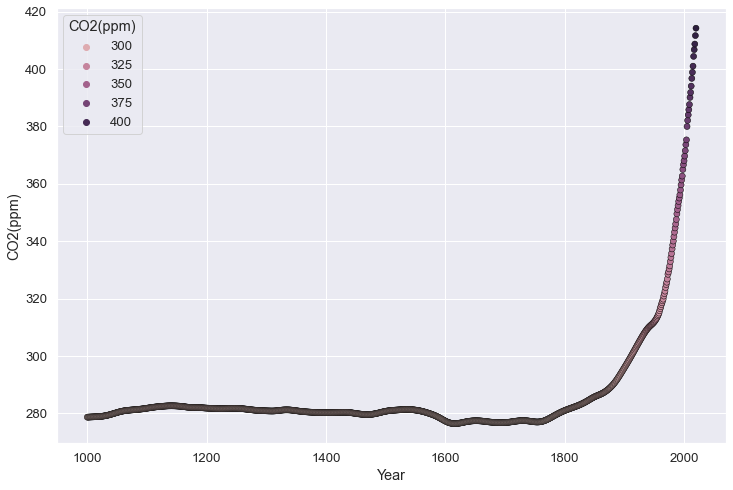

In [49]:
import seaborn as sns
sns.set_style("darkgrid") 
sns.scatterplot(x="Year",y="CO2(ppm)",hue="CO2(ppm)",edgecolor="black",data=co2_merge)
plt.savefig('CO2(ppm) vs Year All Data 1000')

### Importing Global Average Temperature from Berkely Earth (Kaggle)

In [12]:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
# Global Ave Temp data from 1750 to 2004

file = "GlobalTemperatures.csv"

# Read the  csv and store into Pandas DataFrameb
temp_df = pd.read_csv(file, encoding="utf-8")
temp_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


### Clean Temperature Data (Year Data format needs work)

In [13]:
temp_df['Year'] = temp_df['dt'].str[:4]
temp_df = temp_df.rename(columns={"LandAverageTemperature":"Temp"})
# temp_df
temp_df = temp_df.loc[:,["Year","Temp"]]
temp_df

,Year,Temp
0,1750,3.034
1,1750,3.083
2,1750,5.626
3,1750,8.490
4,1750,11.573
...,...,...
3187,2015,14.755
3188,2015,12.999
3189,2015,10.801
3190,2015,7.433


### Average Monthly Data by Year

In [14]:
# Dataset is monthly (note I stripped the months and only left the year).  
# Average Temp by year
annual_temp=temp_df.groupby('Year').mean()
annual_temp.reset_index(inplace=True)
annual_temp

,Year,Temp
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [15]:
# ice_co2_clean_df.dtypes
annual_temp['Year'] = annual_temp.loc[:,'Year'].astype(int)
co2_merge.dtypes
annual_temp.dtypes


Year      int64
Temp    float64
dtype: object

### Merge Temperature and CO2 Data

In [16]:
temp_co2 = pd.merge(co2_merge,annual_temp,how='inner',on='Year')
temp_co2

,Year,CO2(ppm),Temp
0,1750,277.03,8.719364
1,1751,277.02,7.976143
2,1752,277.00,5.779833
3,1753,276.99,8.388083
4,1754,276.99,8.469333
...,...,...,...
261,2011,391.85,9.516000
262,2012,394.06,9.507333
263,2013,396.74,9.606500
264,2014,398.87,9.570667


### Create basic Plots of Raw Temperature and CO2 Data

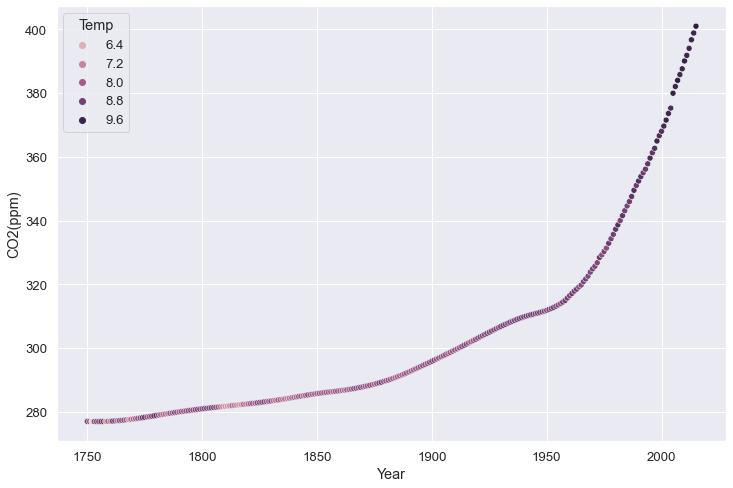

In [47]:
import seaborn as sns
sns.set_style("darkgrid") 
sns.scatterplot(x="Year",y="CO2(ppm)",hue="Temp",data=temp_co2)
plt.savefig('CO2 vs Year All Data 1750')

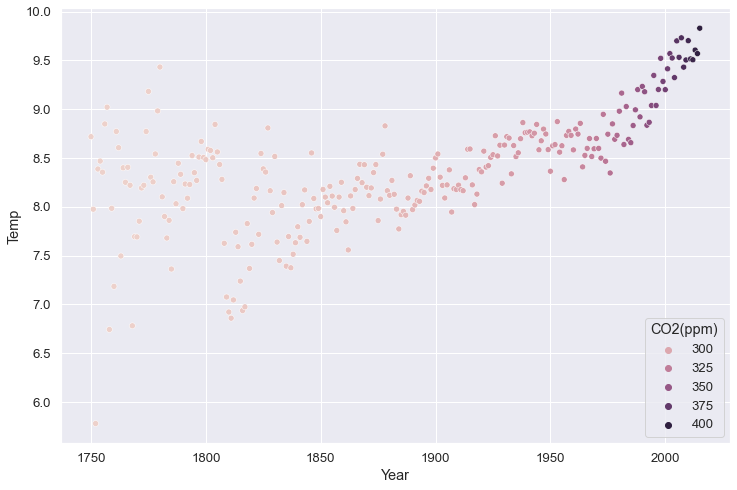

In [48]:
import seaborn as sns
sns.set_style("darkgrid") 
sns.scatterplot(x="Year",y="Temp",hue="CO2(ppm)",data=temp_co2)
plt.savefig('Temp vs Year All Data 1750')

<AxesSubplot:xlabel='CO2(ppm)', ylabel='Temp'>

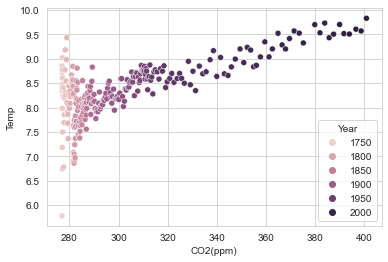

In [19]:
import seaborn as sns
sns.scatterplot(x="CO2(ppm)",y="Temp",hue="Year",data=temp_co2)

### In Parallel....
### Dataframe with Temp and CO2 data was merged with Natural Disaster Data

In [20]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
# from meteostat import Point, Monthly, units, Daily, Stations, Normals
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser

### Download Temperature and CO2 data

In [21]:
file_path="temp_co2.csv"
df = pd.read_csv(file_path)

![CO2(ppm) vs Temp.png](TempVSCo2_HYC.png)

### Download Disaster data from kaggle "natural-disaster-data"

In [22]:
disasterdata_path="all_data_combined.csv"
disaster_df = pd.read_csv(disasterdata_path)

### Drop irrelevant columns and rename remaining columns (Year, All Natural Disaster, Drought, Extreme Temperature, Extreme Weather, Flood, Wildfire)

In [23]:
labels = ["Unnamed: 0"]
df.drop(columns = labels, inplace=True)
# disaster_df.drop(columns = labels, inplace=True)

In [24]:
disaster_df.drop(['Earthquake (Occurrence)', 'Impact (Occurrence)', 'Landslide (Occurrence)',
                       'Mass movement (dry) (Occurrence)', 'Volcanic activity (Occurrence)',
                       'LandAndOceanAverageTemperatureUncertainty', 'SP500', 'Dividend', 'Earnings',
                      'Consumer Price Index', 'Long Interest Rate', 'LandAverageTemperature',
                      'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                      'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
                       'Real Price', 'Real Dividend', 'PE10', 'Real Earnings'], axis = 1, inplace=True)

In [25]:
disaster_df.head(1)

,Unnamed: 0,All natural disasters (Occurrence),Drought (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Wildfire (Occurrence)
0,1900,5.0,2.0,0.0,1.0,1.0,0.0


In [26]:
# # RENAME COLUMNS
disaster_df.columns = ['Year', 'All Natural Disaster',
       'Drought', 'Extreme Temperature',
       'Extreme Weather', 'Flood',
       'Wildfire']

In [27]:
disaster_df.head()

,Year,All Natural Disaster,Drought,Extreme Temperature,Extreme Weather,Flood,Wildfire
0,1900,5.0,2.0,0.0,1.0,1.0,0.0
1,1901,2.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,0.0,1.0,0.0,0.0
3,1903,8.0,1.0,0.0,2.0,2.0,0.0
4,1904,2.0,0.0,0.0,1.0,0.0,0.0


In [28]:
df.head(1)

,Year,CO2(ppm),Temp
0,1850,285.77,7.900667


### Merge 'Temperature and CO2' dataset with 'Disaster' dataset on 'Year'

In [29]:
# # MERGE Temp_CO2 & Disaster dataframes
df2 = pd.merge(df,disaster_df, how="left", on="Year")

In [30]:
df2.shape

(166, 9)

In [31]:
df2.head(1)

,Year,CO2(ppm),Temp,All Natural Disaster,Drought,Extreme Temperature,Extreme Weather,Flood,Wildfire
0,1850,285.77,7.900667,NaN,NaN,NaN,NaN,NaN,NaN


### Drop years without 'Disaster' data to ensure years have all relevant columns

In [32]:
#Drop years without disaster data (NaN rows)
df2.dropna(axis = 0, how ='any', inplace=True)
df2.shape

(116, 9)

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Wildfire, CO2, and Year from 1900-2015

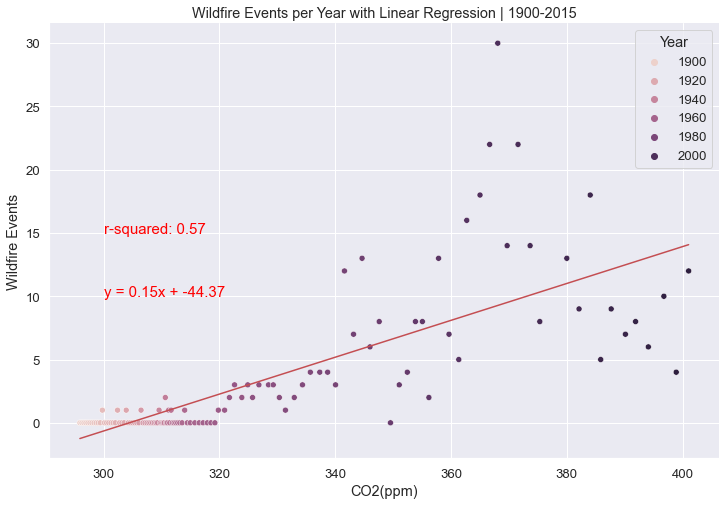

In [33]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

dist_col_indx = 8

year_list = df2.iloc[:,0]
co2_list = df2.iloc[:,1]
temp_list = df2.iloc[:,2]

x_axis = co2_list
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

sns.scatterplot(x="CO2(ppm)",y="Wildfire",hue="Year",data=df2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,15),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,10),fontsize=15,color="red")

plt.title(f"{y_name} Events per Year with Linear Regression | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Flood, CO2, and Year from 1900-2015

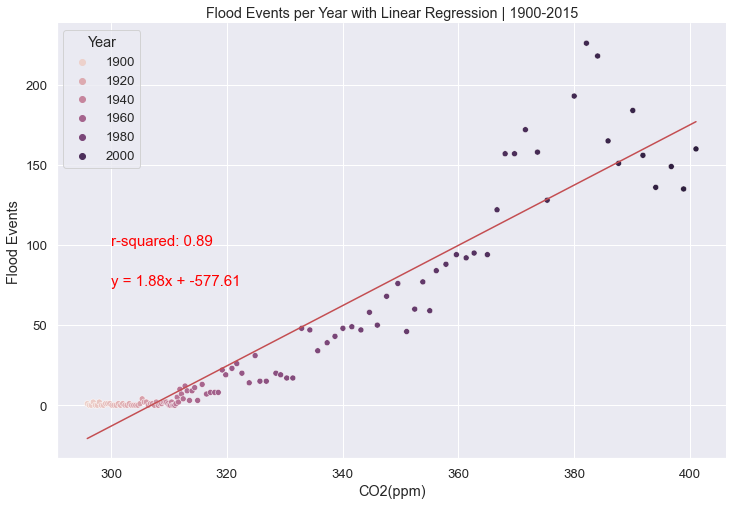

In [34]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

dist_col_indx = 7

year_list = df2.iloc[:,0]
co2_list = df2.iloc[:,1]
temp_list = df2.iloc[:,2]

x_axis = co2_list
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

sns.scatterplot(x="CO2(ppm)",y="Flood",hue="Year",data=df2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,100),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,75),fontsize=15,color="red")

plt.title(f"{y_name} Events per Year with Linear Regression | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Flood, CO2, and Year from 1900-2015

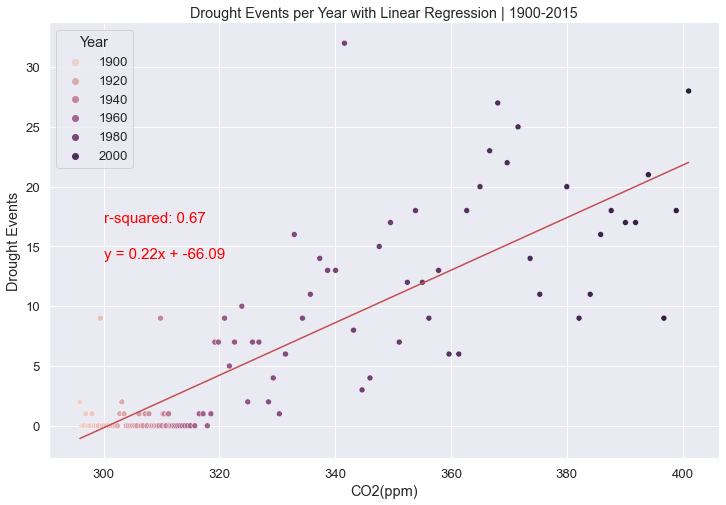

In [35]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

dist_col_indx = 4

year_list = df2.iloc[:,0]
co2_list = df2.iloc[:,1]
temp_list = df2.iloc[:,2]

x_axis = co2_list
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

sns.scatterplot(x="CO2(ppm)",y="Drought",hue="Year",data=df2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,17),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,14),fontsize=15,color="red")

plt.title(f"{y_name} Events per Year with Linear Regression | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Extreme Temperature, CO2, and Year from 1900-2015

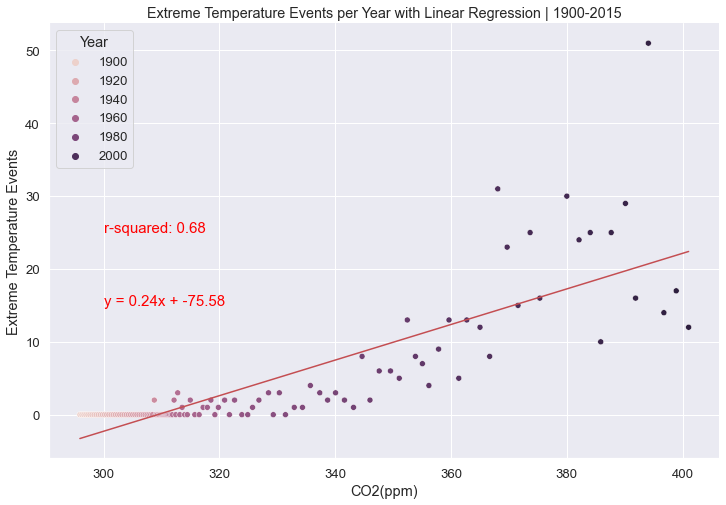

In [36]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

dist_col_indx = 5

year_list = df2.iloc[:,0]
co2_list = df2.iloc[:,1]
temp_list = df2.iloc[:,2]

x_axis = co2_list
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

sns.scatterplot(x="CO2(ppm)",y="Extreme Temperature",hue="Year",data=df2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,25),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,15),fontsize=15,color="red")

plt.title(f"{y_name} Events per Year with Linear Regression | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for All Natural Disaster, CO2, and Year from 1900-2015

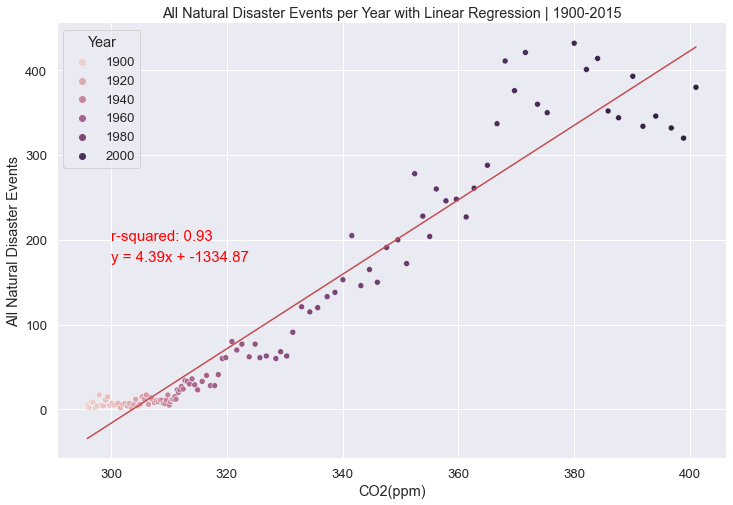

In [37]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

dist_col_indx = 3

year_list = df2.iloc[:,0]
co2_list = df2.iloc[:,1]
temp_list = df2.iloc[:,2]

x_axis = co2_list
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

sns.scatterplot(x="CO2(ppm)",y="All Natural Disaster",hue="Year",data=df2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,200),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,175),fontsize=15,color="red")

plt.title(f"{y_name} Events per Year with Linear Regression | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Extreme Weather, CO2, and Year from 1900-2015

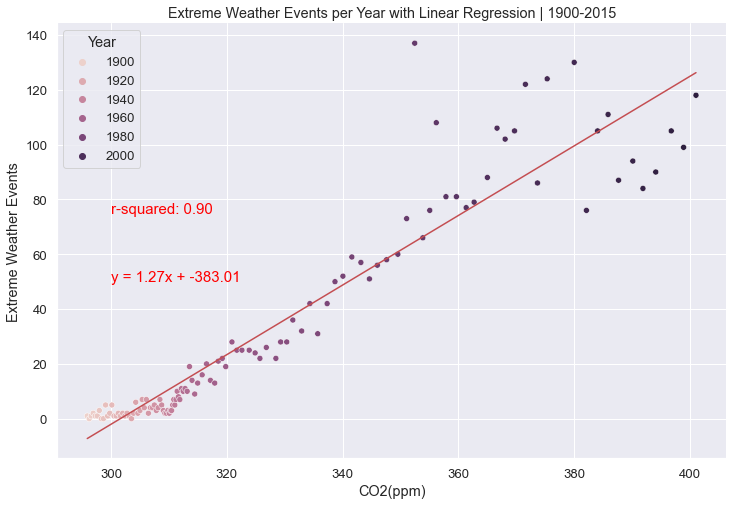

In [38]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);

dist_col_indx = 6

year_list = df2.iloc[:,0]
co2_list = df2.iloc[:,1]
temp_list = df2.iloc[:,2]

x_axis = co2_list
y_axis = df2.iloc[:,dist_col_indx]

y_name=df2.columns[dist_col_indx]

sns.scatterplot(x="CO2(ppm)",y="Extreme Weather",hue="Year",data=df2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,75),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,50),fontsize=15,color="red")

plt.title(f"{y_name} Events per Year with Linear Regression | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/{y_name}_year_HYC.png')

In [39]:
df2.head()

,Year,CO2(ppm),Temp,All Natural Disaster,Drought,Extreme Temperature,Extreme Weather,Flood,Wildfire
50,1900,295.90,8.501583,5.0,2.0,0.0,1.0,1.0,0.0
51,1901,296.24,8.541917,2.0,0.0,0.0,0.0,0.0,0.0
52,1902,296.59,8.304417,9.0,0.0,0.0,1.0,0.0,0.0
53,1903,296.93,8.220167,8.0,1.0,0.0,2.0,2.0,0.0
54,1904,297.28,8.090917,2.0,0.0,0.0,1.0,0.0,0.0


### Create dataframe for CO2 > 350 to show breakdown in correlation as CO2 increased

In [40]:
co2_greater = df2[df2['CO2(ppm)'] > 350][['Year','CO2(ppm)', 'Extreme Weather']]
co2_greater.head(1)

,Year,CO2(ppm),Extreme Weather
139,1989,351.045,73.0


### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Extreme Weather, CO2 > 350, and Year from 1900-2015

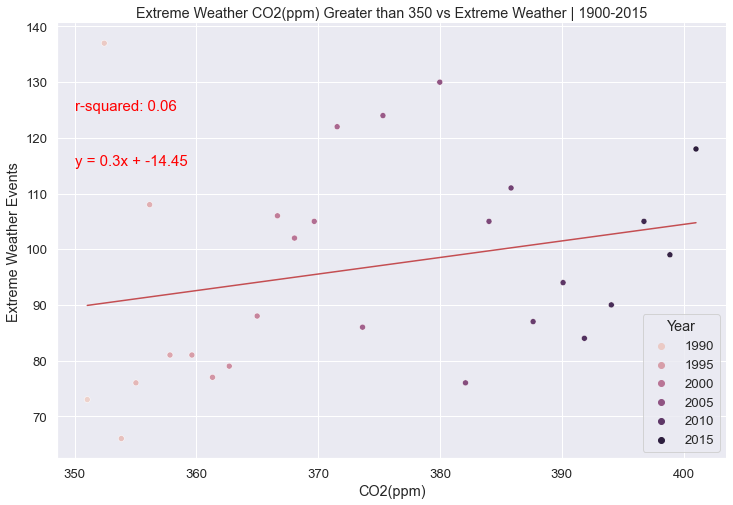

In [41]:
# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);


year_list = co2_greater.iloc[:,0]
co2_list = co2_greater.iloc[:,1]
weather_list = co2_greater.iloc[:,2]

x_axis = co2_list
y_axis = weather_list

sns.scatterplot(x="CO2(ppm)",y="Extreme Weather",hue="Year",data=co2_greater)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(350,125),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(350,115),fontsize=15,color="red")

plt.title(f"{y_name} CO2(ppm) Greater than 350 vs Extreme Weather | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/CO2(ppm)_GreaterThan350_HYC.png')

### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Wildfire, CO2, and Year from 1900-2015

#### 3. Using CO2 and Temperature merge data dataNatural occurance data is from 190 to 2015.
#### - https://www.kaggle.com/dataenergy/natural-disaster-data


### Create dataframe for CO2 < 350 to show correlation as CO2 increased up to 350 ppm

In [42]:
co2_less = df2[df2['CO2(ppm)'] <= 350][['Year','CO2(ppm)', 'Extreme Weather']]
co2_less.head(1)

,Year,CO2(ppm),Extreme Weather
50,1900,295.9,1.0


### Using seaborn to plot data, plt to format, and scipi to run statisical equations created graphs for Extreme Weather, CO2 < 350, and Year from 1900-2015

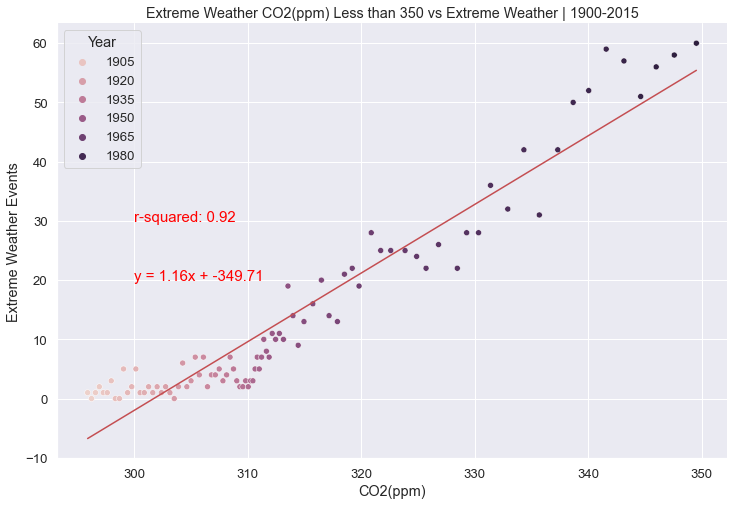

In [43]:


# # # REF--------REF--------REF--------REF--------REF--------REF--------
# # SEABORN plotting method
# sns.scatterplot(x="Year",y="All Natural Disaster",data=df2);


year_list = co2_less.iloc[:,0]
co2_list = co2_less.iloc[:,1]
weather_list = co2_less.iloc[:,2]

x_axis = co2_list
y_axis = weather_list

sns.scatterplot(x="CO2(ppm)",y="Extreme Weather",hue="Year",data=co2_less)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = co2_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquare = f'r-squared: {rvalue**2:.2f}'
plt.annotate(rsquare,(300,30),fontsize=15,color="red")

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(300,20),fontsize=15,color="red")

plt.title(f"{y_name} CO2(ppm) Less than 350 vs Extreme Weather | 1900-2015")
plt.xlabel("CO2(ppm)")
plt.ylabel(f"{y_name} Events");

plt.savefig(f'../png_data/CO2(ppm)_LessThan350_HYC.png')

